# Tarea 6: Iteadores y Generadores
# Miguel Feles y Juan Benavides


**Instrucciones**

+ Responda las siguientes preguntas según el enunciado de cada una. 

+ Al terminar guarde su archivo con los apellidos de cada uno en el grupo separados por el símbolo _ por ejemplo: **apellido1_apellido2.jpynb**. 

+ Envíe la tarea al correo: german.combariza@uexternado.edu.co antes de las 11:59pm de la fecha dada. Tareas enviadas después de la hora no se reciben.

+ **Secciones:**
Para esta tarea ud puede consultas las siguientes secciones del libro: 
 Seccion 4.2 de: http://composingprograms.com/

+ Usted puede trabajar en grupo, pero por favor cada uno escriba sus propias solucinoes, **la copia será tratada de acuerdo al reglamento estudiantil**.  

In [1]:
#@title Necesitaras estas funciones
def tree(root_label, branches=[]):
    for branch in branches:
        assert is_tree(branch), 'branches must be trees'
    return [root_label] + list(branches)

def label(tree):
    return tree[0]

def branches(tree):
    return tree[1:]

def is_tree(tree):
    if type(tree) != list or len(tree) < 1:
        return False
    for branch in branches(tree):
        if not is_tree(branch):
            return False
    return True

def is_leaf(tree):
    return not branches(tree)

    
def print_tree(t, indent=0):
    print('  ' * indent + str(label(t)))
    for branch in branches(t):
        print_tree(branch, indent + 1)

**Pregunta 1:** Generar permutaciones

Dada una secuencia de elementos únicos, una permutación de la secuencia es una lista que contiene los elementos de la secuencia en algún orden arbitrario. Por ejemplo, [2, 1, 3], [1, 3, 2] y [3, 2, 1] son ​​algunas de las permutaciones de la secuencia [1, 2, 3].

Implemente gen_perms, una función de generador que toma una secuencia de secuencia y devuelve un generador que produce todas las permutaciones de secuencia. Para esta pregunta, suponga que seq no estará vacío.

Las permutaciones se pueden producir en cualquier orden. Tenga en cuenta que las pruebas documentales prueban si está produciendo todas las permutaciones posibles, pero no en un orden en particular. La función ordenada incorporada toma un objeto iterable y devuelve una lista que contiene los elementos del iterable en orden no decreciente.

Sugerencia: si tuviera las permutaciones de todos los elementos en la secuencia sin incluir el primer elemento, ¿cómo podría usar eso para generar las permutaciones de la secuencia completa?

Sugerencia: recuerde, es posible hacer un bucle sobre los objetos generadores porque los generadores son iteradores.

In [125]:
def gen_perms(seq):
    """Genera todas las permutaciones de la secuencia dada. Cada permutación es 
    una lista de los elementos en SEQ en un orden diferente. Las permutaciones 
    pueden darse en cualquier orden.

    >>> perms = gen_perms([100])
    >>> type(perms)
    <class 'generator'>
    >>> next(perms)
    [100]
    >>> try: #this piece of code prints "No more permutations!" if calling next would cause an error
    ...     next(perms)
    ... except StopIteration:
    ...     print('No more permutations!')
    No more permutations!
    >>> sorted(gen_perms([1, 2, 3])) # Returns a sorted list containing elements of the generator
    [[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]
    >>> sorted(gen_perms((10, 20, 30)))
    [[10, 20, 30], [10, 30, 20], [20, 10, 30], [20, 30, 10], [30, 10, 20], [30, 20, 10]]
    >>> sorted(gen_perms("ab"))
    [['a', 'b'], ['b', 'a']]
    """
    lista = list(seq)
    iterador = iter(lista)
    listaRetorno  = []
    for i in range(len(lista)):
        listaAux = lista[1:]
        listaAux.append(next(iterador))
        listaRetorno.append(listaAux)
        lista = listaAux   
    lista = list(seq)
    lista = lista[::-1]
    iterador = iter(lista)
    for i in range(len(lista)):
        listaAux = lista[1:]
        listaAux.append(next(iterador))
        if listaAux in listaRetorno: listaRetorno.remove(listaAux)
        listaRetorno.append(listaAux)
        lista = listaAux
    return listaRetorno

**Pregunta 2:** Trayectorias de rendimiento.

Defina una función generadora path_yielder que tome un árbol t, un valor de valor, y devuelva un objeto generador que produzca cada ruta desde la raíz de t hasta un nodo que tenga un valor de label.

Cada ruta debe representarse como una lista de las etiquetas a lo largo de esa ruta en el árbol. Puede encontrar los caminos en cualquier orden.

Le hemos proporcionado un esqueleto. No necesita usar este esqueleto, pero si su implementación se aparta significativamente de él, es posible que desee pensar en cómo puede hacer que se ajuste al esqueleto.

In [134]:
def path_yielder(t, value):
    """Produce todas las rutas posibles desde la raíz de t hasta un nodo con 
       el valor de la etiqueta como una lista.

    >>> t1 = tree(1, [tree(2, [tree(3), tree(4, [tree(6)]), tree(5)]), tree(5)])
    >>> print_tree(t1)
    1
      2
        3
        4
          6
        5
      5
    >>> next(path_yielder(t1, 6))
    [1, 2, 4, 6]
    >>> path_to_5 = path_yielder(t1, 5)
    >>> sorted(list(path_to_5))
    [[1, 2, 5], [1, 5]]

    >>> t2 = tree(0, [tree(2, [t1])])
    >>> print_tree(t2)
    0
      2
        1
          2
            3
            4
              6
            5
          5
    >>> path_to_2 = path_yielder(t2, 2)
    >>> sorted(list(path_to_2))
    [[0, 2], [0, 2, 1, 2]]
    """
    if value == label(t): yield [value]
    for branch in branches(t):
        for ruta in path_yielder(branch, value): yield [label(t)] + ruta
            

Sugerencia: si tiene problemas para comenzar, piense en cómo abordaría este problema si no fuera una función de generador. ¿Cuáles serían tus llamadas recursivas? Con una función de generador, ¿qué sucede si realiza una "llamada recursiva" dentro de su cuerpo?

Sugerencia: recuerde, es posible hacer un bucle sobre los objetos generadores porque los generadores son iteradores.

Nota: Recuerde que este problema debería generar elementos, ¡no devuelva una lista!

**Pregunta 3:** Pre-orden

Defina la función preorder, que toma un árbol como argumento y devuelve una lista de todas las entradas del árbol en el orden en que print_tree las imprimiría.

El siguiente diagrama muestra el orden en que se imprimirían los nodos, con las flechas que representan llamadas a funciones.

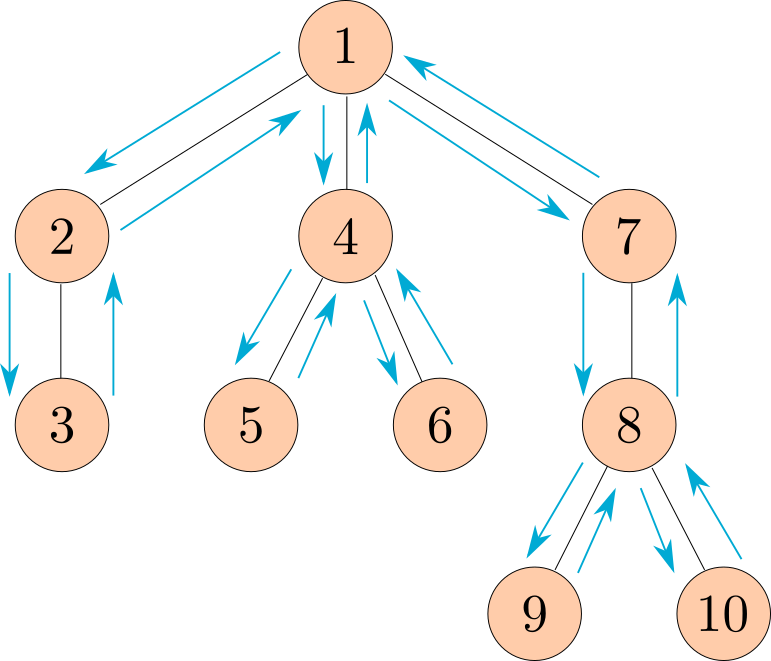

In [129]:
def preorder(t):
    """Devuelva una lista de las entradas en este árbol en el orden en que 
    serían visitadas por un recorrido de preorden (consulte la descripción del 
    problema).

    >>> numbers = tree(1, [tree(2), tree(3, [tree(4), tree(5)]), tree(6, [tree(7)])])
    >>> preorder(numbers)
    [1, 2, 3, 4, 5, 6, 7]
    >>> preorder(tree(2, [tree(4, [tree(6)])]))
    [2, 4, 6]
    """
    if is_leaf(t):
        return [label(t)]
    else:
         return [label(t)] + sum([preorder(b) for b in branches(t)],[])


**Pregunta 4:** Generar pedido anticipado

De manera similar al preorder en la Pregunta 3, defina la función generate_preorder, que toma un árbol como argumento y ahora, en su lugar, produce las entradas en el árbol en el orden en que las imprimiría print_tree.

Sugerencia: ¿Cómo puede modificar su implementación de orden anticipado para producir sus llamadas recursivas en lugar de devolverlas?

In [130]:
def generate_preorder(t):
    """Proporcione las entradas en este árbol en el orden en que serían 
    visitadas por un recorrido de preorden (consulte la descripción del problema).

    >>> numbers = tree(1, [tree(2), tree(3, [tree(4), tree(5)]), tree(6, [tree(7)])])
    >>> gen = generate_preorder(numbers)
    >>> next(gen)
    1
    >>> list(gen)
    [2, 3, 4, 5, 6, 7]
    """
    for i in preorder(t):
        yield i
    if is_leaf(t):
        yield [label(t)]
    else:
        yield [label(t)]+sum([preorder(b) for b in branches(t)],[])
     